# Unidad 3: Análisis de imágenes - preprocesamientos básicos con OpenCV, convoluciones y filtros

En este notebook, ilustraremos una serie de preprocesamientos básicos que se pueden realizar sobre __datos no estructurados__ de tipo imagénes utilizando la librería OpenCV: https://opencv.org/.

OpenCV es una biblioteca libre de visión artificial escritas en C/C++.

Para instalar OpenCV en Ubuntu y encapsular la librería en Python, se recomienda seguir el tutorial: https://www.pyimagesearch.com/2018/08/15/how-to-install-opencv-4-on-ubuntu/

In [30]:
import cv2
import numpy as np

OpenCV utiliza estructuras de datos NumPy para representar imágenes: matrices de n dimensiones (__ndarray__).

In [ ]:
from matplotlib import pyplot as plt

Utilizaremos MatplotLib para visualizar las imágenes desde los Notebooks.

## 1. Leer, Visualizar y Guardar una imágen

¿Cómo leer y visualizar una imágen?:

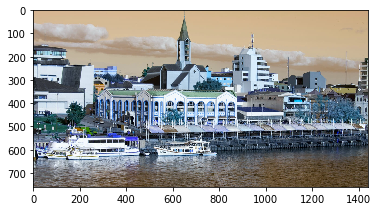

In [33]:
#Cargar una imágen con OpenCV
img = cv2.imread("./valdivia.jpg")

#Visualizar la imágen con Matplotlib
plt.imshow(img)

Como pueden observalo, la imágen no aparece con sus colores normales. Esto es debido a qué existen varias maneras de representar los colores, el formato RGB (componentes Red-Green-Blue entre 0 y 255) es lo más conocido. Es el formato que utiliza por defecto Matplotlib. OpenCV utiliza por defecto el formato BGR.

Convertiremos la imágen cargada en OpenCV en RGB:

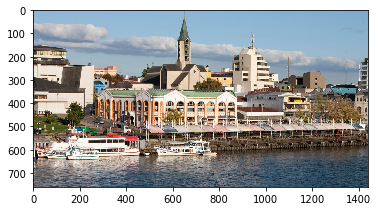

In [34]:
RGB_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Visualizar la imágen con Matplotlib
plt.imshow(RGB_img)

El comando siguiente nos permite saber cuál es el formato de datos de la variable RGB_img:

In [20]:
type(RGB_img)

numpy.ndarray

__¿A qué corresponden los 3 datos que devuelve la variable _shape_?__

In [36]:
print(RGB_img.shape)

(760, 1440, 3)


__¿A qué corresponden los datos siguientes?__

In [69]:
RGB_img[0][0]

array([148, 181, 214], dtype=uint8)

In [81]:
img[0][0]

array([214, 181, 148], dtype=uint8)

Buscamos el código hexadecimal del color de este pixel con el paquete webcolors:

In [88]:
import webcolors as colors
colors.rgb_to_hex((148,181,214))

'#94b5d6'

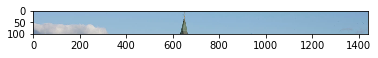

In [62]:
plt.imshow(RGB_img[:100][:200])

Convertimos los colores de la imagén a una escala de gris y guardaremos la nueva imágen en un archivo:

In [90]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imwrite('valdivia-gray.jpg', gray_img)

True

También podemos modificar el formato del archivo para pasar al formato PNG por ejemplo:

In [91]:
cv2.imwrite('valdivia-gray.png', gray_img, [cv2.IMWRITE_PNG_COMPRESSION])

True

## 2. Trasladar imágenes 

Un primer preprocesamiento básico consiste en trasladar la imágen, es decir mover los pixeles en cierta dirección.

In [95]:
#Recuperamos las dimensiones de la imagen
num_rows,num_cols=RGB_img.shape[:2]
print("x:"+str(num_rows),"y:"+str(num_cols))

x:760 y:1440


In [96]:
#Crearmos una matriz de traslado, permitirá incrementar:
#- la posición X de los pixeles de 70pixeles hacia la derecha
#- la posición Y de los íxeles de 110pixeles hacia abajo
translation_matrix = np.float32([[1,0,70], [0,1,110]])

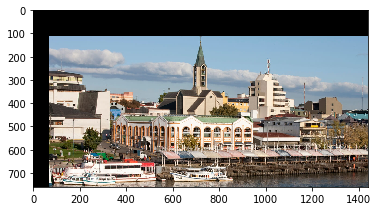

In [98]:
#Aplicamos la matriz de transformación con la función warpAffine
RGB_img_translation = cv2.warpAffine(RGB_img,translation_matrix,(num_cols, num_rows),cv2.INTER_LINEAR)
plt.imshow(RGB_img_translation)

Pueden observar que perdemos algunos pixeles a la derecha y abajo debido a que no hemos cambiado las dimensiones de la imágen final. A continuación aumentamos las dimensiones de la imágen para no perder información:

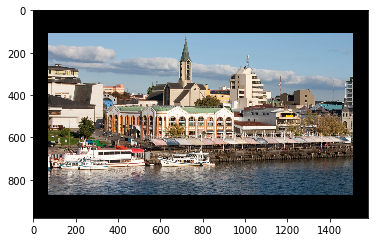

In [99]:
RGB_img_translation = cv2.warpAffine(RGB_img,translation_matrix,(num_cols+140, num_rows+220),cv2.INTER_LINEAR)
plt.imshow(RGB_img_translation)

La función warpAffine tiene dos parametros que permiten llenar bordes vacios con un método de extrapolación de pixeles:

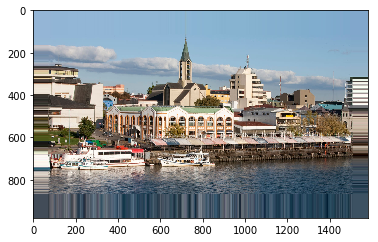

In [102]:
RGB_img_translation = cv2.warpAffine(RGB_img,translation_matrix,(num_cols+140, num_rows+220),
                                     cv2.INTER_LINEAR,cv2.BORDER_WRAP, 1)
plt.imshow(RGB_img_translation)

## 3. Rotación de imágenes

Para rotar una imágen, el principio es el mismo: se crea una matriz de transformación y se aplica a la imágen.

En nuestro ejemplo, rotaremos la imagén de 30°, tomando en cuenta el centro de la imagén como punto centro de rotación:

In [103]:
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),30,1)

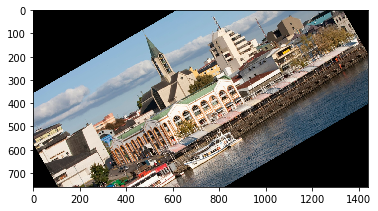

In [104]:
RGB_img_rotation = cv2.warpAffine(RGB_img,rotation_matrix,(num_cols, num_rows))

plt.imshow(RGB_img_rotation)

El tercer argumento de la función <code>getRotationMatrix2D</code> permite realizar un zoom/dezoom al mismo tiempo que la rotación:

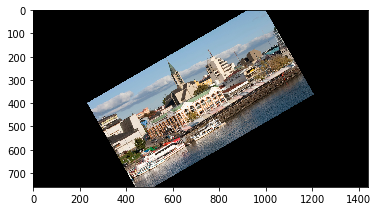

In [106]:
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),30,0.6)

RGB_img_rotation = cv2.warpAffine(RGB_img,rotation_matrix,(num_cols, num_rows))
plt.imshow(RGB_img_rotation)

__¿Qué hace el código siguiente?__

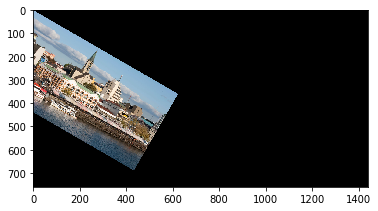

In [107]:
rotation_matrix = cv2.getRotationMatrix2D((0,0),-30,0.5)

RGB_img_rotation = cv2.warpAffine(RGB_img,rotation_matrix,(num_cols, num_rows))
plt.imshow(RGB_img_rotation)

## 5. Redimensionar imágenes

Aumentar o reducir el tamaño de una imágen es una operación muy común en visión artificial. Para redimensionar la imagén se puede aplicar un coeficiente de redimencionamiento o redimencionar a un tamaño específico.

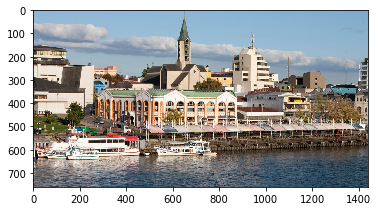

In [111]:
plt.imshow(RGB_img)

Aumentamos el tamañano de la imagen con un coeficiente de 2 en el eje Y. No modificamos el eje X.

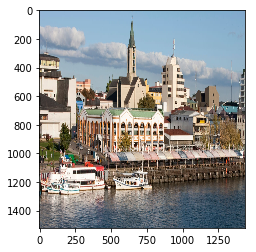

In [112]:
img_scaled = cv2.resize(RGB_img,None,fx=1.0, fy=2.0, interpolation = cv2.INTER_LINEAR)

plt.imshow(img_scaled)

Cambiamos el tamaño de la imágen a una dimensión específica. Por ejemplo 450x400:

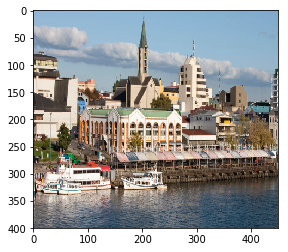

In [114]:
img_scaled = cv2.resize(RGB_img,(450, 400), interpolation = cv2.INTER_AREA)
plt.imshow(img_scaled)

Podemos observar que el tamaño de la matriz efectivamente cambió:

In [115]:
img_scaled.shape

(400, 450, 3)

__¿De qué sirve la variable interpolation al momento de cambiar las dimensiones de la imágen? ¿Existen otros métodos de interpolación?__

## 6. Proyecciones geométricas con 3 puntos de referencias

Con OpenCV es posible proyectar la imágen en otro espacio, especificando cómo se proyectan 3 puntos de referencias. Por ejemplo, la imagen siguiente ilustra cómo se proyectan 3 puntos de referencias para generar una nueva imágen

<img src="img1.png" />

In [119]:
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(num_cols-1)),0],[int(0.4*(num_cols-1)),num_rows-1]])

affine_matrix = cv2.getAffineTransform(src_points, dst_points)

img_output = cv2.warpAffine(RGB_img, affine_matrix, (num_cols,num_rows))

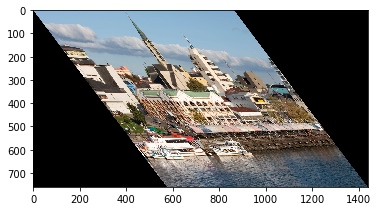

In [120]:
plt.imshow(img_output)

También se puede generar la imágen espejo siguiendo la ilustración siguiente:

<img src="img2.png" />

In [122]:
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
dst_points = np.float32([[num_cols-1,0], [0,0], [num_cols-1,num_rows-1]])

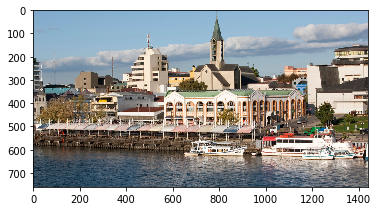

In [123]:
affine_matrix = cv2.getAffineTransform(src_points, dst_points)

img_output = cv2.warpAffine(RGB_img, affine_matrix, (num_cols,num_rows))
plt.imshow(img_output)

## 7. Proyecciones geométricas con 4 puntos de referencias

También se puede realizar proyecciones definiendo 4 puntos de referencias en un nuevo espacio, por ejemplo:

In [131]:
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1], [num_cols-1,num_rows-1]])
dst_points = np.float32([[0,0], [num_cols-1,0], [int(0.33*num_cols),num_rows-1],[int(0.66*num_cols),num_rows-1]])

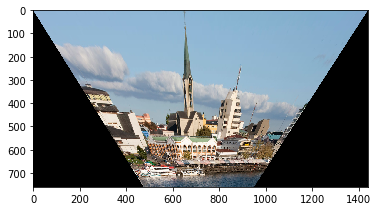

In [132]:
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(RGB_img, projective_matrix, (num_cols,num_rows))
plt.imshow(img_output)

## 8. Ejercicio

Buscar 5 imágenes de perro y 5 imágenes de gato en Internet y guardarlas en una carpeta. Luego, convertir todas las imagenes al formato PNG, en escala de gris y redimensionar las imagenes para que tengan todas las mismas dimensiones (por ejemplo 400x400). Finalmente guardar las nuevas imagenas obtenidas en una carpeta 'dataset'.

# Convoluciones y filtros

Una __convolución__ es una operación matemática entre 2 matrices.

En visión artificial, la convolución consiste en transformar la __imagen inicial__ utilizando una matriz __filtro__ (o kernel) para generar una nueva matriz __imagen output__:

La matriz filtro corresponde a menudo a una matriz 3x3 o 5x5.

En visión artificial, la operación de __convolución__  es clave en todas las aplicaciones actuales de inteligencia artificial (clasificación de imagenes, reconocimiento de objetos, etc.).

__Realizar una convolución__:
- Se multiplica el valor de cada pixel del filtro por el valor correspondiente en la imagen.
- Se adiciona los resultados de cada multiplicación. 
- El resultado final es el nuevo valor en la matriz output.

En la ilustración siguiente se utiliza un filtro de 3x3:[[1,0,1],[0,1,0],[1,0,1]]

<img src="convolution2.gif" width=50%/>

En visión artificial, convoluciones con ciertos filtros tienen propiedades interesantes que vamos a observar a continuación:

In [133]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 9. Convolución con filtros para desenfocar una imagen (efecto _blur_)

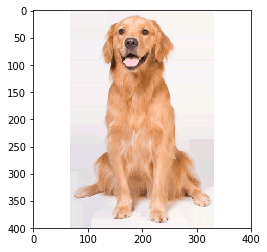

In [134]:
img = cv2.imread("./perro.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

rows, cols = img.shape[:2]

plt.imshow(img)

El efecto 'blur' se refiere a hacer el promedio de los valores de los píxeles vecinos. 

Una manera sencilla de construir un filtro que realiza el efecto 'blur' consiste en ir promediando uniformemente los valores en la vecindad de un píxel. Podemos elegir el tamaño del filtro en función de cuánto queramos suavizar la imagen. Si se elige un tamaño más grande, entonces estaremos haciendo un promedio sobre un área más grande. Esto tiende a aumentar el efecto 'blur'. Veamos un ejemplo:

In [135]:
kernel_3x3 = np.ones((3,3), np.float32) / 9.0 # Divide by 9 to normalize the kernel
kernel_5x5 = np.ones((5,5), np.float32) / 25.0 # Divide by 25 to normalize the kernel

__¿Qué valores contienen los filtros creados?__

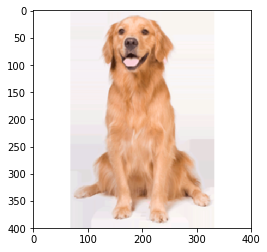

In [136]:
output = cv2.filter2D(img, -1, kernel_3x3)
plt.imshow(output)

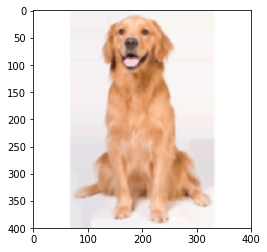

In [137]:
output = cv2.filter2D(img, -1, kernel_5x5)
plt.imshow(output)

Si miramos las imágenes cuidadosamente, podemos ver que se vuelven más borrosos a medida que aumentamos el tamaño del filtro.

También podemos aplicar el filtro varias veces para aumentar el efecto:

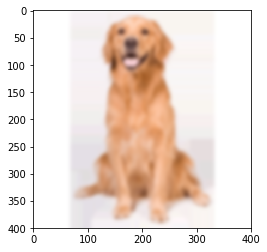

In [138]:
for i in range(0,5):
    output = cv2.filter2D(output, -1, kernel_5x5)

plt.imshow(output)

## 10. Convolución con filtros para mejorar la nitidez de una imagen (efecto _sharp_)

Aplicando el filtro de nitidez se agudizarán los bordes de la imagen. Este filtro es muy útil cuando queremos mejorar los bordes de una imagen que no es lo suficientemente nítida.

Vamos a probar 5 filtros que permiten reforzar los bordes de una imagen:

In [139]:
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
[-1,2,2,2,-1],
[-1,2,8,2,-1],
[-1,2,2,2,-1],
[-1,-1,-1,-1,-1]]) / 8.0

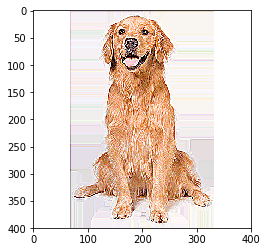

In [140]:
# applying different kernels to the input image
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)

plt.imshow(output_1)

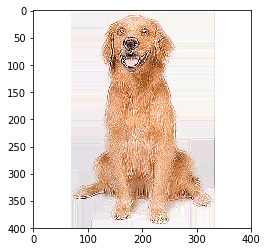

In [141]:
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)

plt.imshow(output_2)

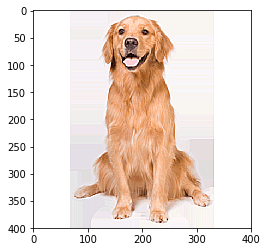

In [142]:
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)

plt.imshow(output_3)

Se puede observar que con los dos primeros filtros la imagen de salida parece artificial. Si queremos que nuestras imágenes tengan un aspecto más natural, se puede utilizar el tercer filtro que realza los bordes y suaviza al mismo tiempo, haciendo que la imagen se ve más natural.

## 11. Convolución con filtros para detectar los bordes

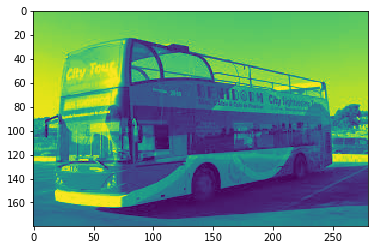

In [145]:
img = cv2.imread("./bus.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img)

Llegamos a filtros muy interesantes para aplicaciones de clasificación y reconocimiento de imágenes. Existen filtros que permiten transformar la imágen inicial y destacar los bordes, permitiendo luego de reconocer formas  cada vez más complejas.

Comencemos con un simple filtro de detección de bordes conocido como el filtro Sobel. Dado que los bordes pueden aparecer tanto en dirección horizontal como vertical, el filtro de Sobel está compuesto por los dos núcleos siguientes:

<img src="sobel.png" width="50%"/>

OpenCV proporciona una función para aplicar directamente el filtro de Sobel a una imagen determinada. Aquí está el código para usar los filtros de Sobel para detectar bordes:

In [146]:
# Kernel size can be: 1,3,5 or 7.
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

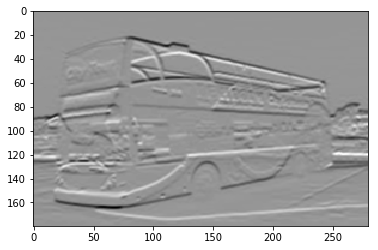

In [147]:
plt.imshow(sobel_horizontal, cmap="gray")

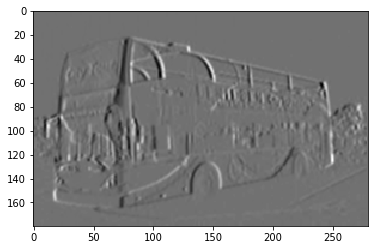

In [148]:
plt.imshow(sobel_vertical, cmap="gray")

Como podemos ver aquí, el filtro de Sobel detecta los bordes en dirección horizontal o vertical pero no nos da una visión completa de todos los bordes. Para superar esto, podemos utilizar el filtro laplaciano. La ventaja de usar este filtro es que utiliza un doble derivado en ambas direcciones. Puede llamar la función utilizando la siguiente línea:

In [149]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

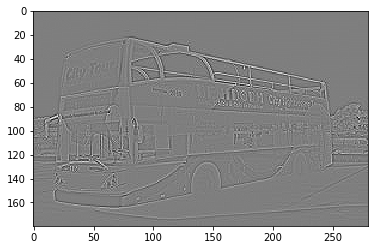

In [150]:
plt.imshow(laplacian, cmap="gray")

Aunque el filtrolaplaciano funcionó bien en ciertos casos, no siempre funciona bien. Da lugar a mucho ruido en la salida, como se muestra en el siguiente ejemplo. En ciertos casos el detector de bordes Canny resulta mejor:

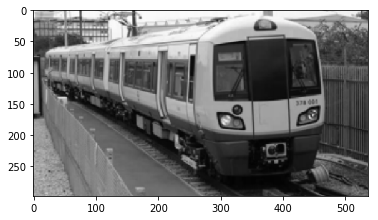

In [151]:
img = cv2.imread("./train.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian, cmap="gray")

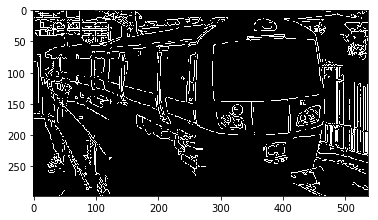

In [152]:
canny = cv2.Canny(img, 15, 300)
plt.imshow(canny, cmap="gray")

## 12. Ejercicio

- Crear una imagen artificial con Numpy de dimensión 6x6, los 18 pixeles a la izquierda de la imagen tendrán el valor 10, los otros pixeles tendrán el valor 0 (ver ilustración).

- Aplicar un filtro 3x3 que tiene los valores indicado en la ilustración.

<img src="ejercicio.png" width="50%"/>

__¿Cómo podrian explicar el resultado obtenido en la imágen output?__
